In [1]:
# Input a newick file
# Get just the tip names
# in this case, tip names are just NCBI IDs
# From NCBI get the species name
# Replace the NCBI ID in the newick with the Species name
# Save file.

In [2]:
# Imports
from ete3 import Tree, faces, AttrFace, TreeStyle, NodeStyle
import sys; 
#from ete3 import Tree; 
import argparse
from Bio import Entrez
import time
import json
import csv
from collections import Counter
from ete3 import NCBITaxa
import pandas as pd

In [3]:
# Declares, load newick string
#DATA_DICT = {}
Entrez.email = "aglucaci@gmail.com"
TREE_FILE = "../../results/BDNF_Codons.fa_CODON_AWARE_ALN.fasta.treefile"
with open(TREE_FILE, "r") as fh:
    TREE_NEWICK = fh.read()

#TREE_NEWICK = ""
TREE_NEWICK

'(XM_040284582_1_PREDICTED_Ictidomys_tridecemlineatus_brain_derived_neurotrophic_factor_Bdnf_transcript_variant_X1_mRNA_7:0.0154940769,((((((((((((((((((((((((((((((XM_038429434_1_PREDICTED_Canis_lupus_familiaris_brain_derived_neurotrophic_factor_BDNF_transcript_variant_X1_mRNA_7:0.0000029769,(XM_026018602_1_PREDICTED_Vulpes_vulpes_brain_derived_neurotrophic_factor_BDNF_transcript_variant_X3_mRNA_2:0.0000023713,XM_026018600_1_PREDICTED_Vulpes_vulpes_brain_derived_neurotrophic_factor_BDNF_transcript_variant_X1_mRNA_1:0.0000023713)80.8/100:0.0064782176)99.9/100:0.1312547312,(((((XM_036862555_1_PREDICTED_Balaenoptera_musculus_brain_derived_neurotrophic_factor_BDNF_transcript_variant_X4_mRNA_3:0.0000021262,XM_036862552_1_PREDICTED_Balaenoptera_musculus_brain_derived_neurotrophic_factor_BDNF_transcript_variant_X1_mRNA_1:0.0000023713)57.7/100:0.0021565927,(XM_007180994_2_PREDICTED_Balaenoptera_acutorostrata_scammoni_brain_derived_neurotrophic_factor_BDNF_transcript_variant_X4_mRNA_3:0.000002

In [7]:
# helper functions
# The following looks up NCBI Taxon ID from Accession IDs
# Then uses that Taxon ID to get the complete taxnomic lineage of of that species.
DATA_DICT = {}
#Entrez.email = "aglucaci@gmail.com"
def main(TREE_NEWICK):
    global DATA_DICT
    t = Tree(TREE_NEWICK, format=1)
    count = 1
    
    for n, BRANCH_NAME in enumerate(t.get_leaf_names()):
        #BRANCH_NAME = ACCESSION
        #ACCESSION = ACCESSION.split("-")[0]
        s = BRANCH_NAME.split("_")
        ACCESSION = "_".join([s[0], s[1]]) + "." + s[2]
        
        print(n+1, "# Checking ACCESION:", ACCESSION)
        skip = False
        for i in DATA_DICT.keys():
            if ACCESSION == DATA_DICT[i]["ACCESSION"]:
                skip = True
                break
            #end if
        #end for
        
        if skip == True: 
            count += 1
            print("# Skipping:", ACCESSION)
            continue
        #end if
        
        try:
            handle = Entrez.esummary(db="nucleotide", id=ACCESSION, rettype="gb", retmode="text", retmax=1)
            records = Entrez.parse(handle)
        except:
            print("# error, sleeping")
            time.sleep(5)
            handle = Entrez.esummary(db="nucleotide", id=ACCESSION, rettype="gb", retmode="text", retmax=1)
            records = Entrez.parse(handle)
        #end try
        
        #print("# Number of records returned:", sum(1 for r in records))
        try:
            for record in records:
                TAXON_ID = record["TaxId"]
                print(count, "Processing:", str(ACCESSION), str(TAXON_ID))
                #break
                ncbi = NCBITaxa()
                lineage = ncbi.get_lineage(TAXON_ID)
                #print(lineage)
                names = ncbi.get_taxid_translator(lineage)
                DATA_DICT[str(count)] = {"BRANCH_NAME": BRANCH_NAME, "ACCESSION":ACCESSION, "TAXON_ID": TAXON_ID, "LINEAGE": [names[taxid] for taxid in lineage], "TITLE":record["Title"]}
                count += 1
            #end inner for
            
            handle.close
        except:
            print("#error repeating")
            break
            main(TREE_NEWICK)
        #end try

    #end outer for
#end method

main(TREE_NEWICK)
print("#done")

0 # Checking ACCESION: XM_040284582.1
1 Processing: XM_040284582.1 IntegerElement(43179, attributes={})
[1, 131567, 2759, 33154, 33208, 6072, 33213, 33511, 7711, 89593, 7742, 7776, 117570, 117571, 8287, 1338369, 32523, 32524, 40674, 32525, 9347, 1437010, 314146, 314147, 9989, 33553, 55153, 337726, 337730, 1141640, 43179]
1 # Checking ACCESION: XM_038429434.1
2 Processing: XM_038429434.1 IntegerElement(9615, attributes={})
[1, 131567, 2759, 33154, 33208, 6072, 33213, 33511, 7711, 89593, 7742, 7776, 117570, 117571, 8287, 1338369, 32523, 32524, 40674, 32525, 9347, 1437010, 314145, 33554, 379584, 9608, 9611, 9612, 9615]
2 # Checking ACCESION: XM_026018602.1
3 Processing: XM_026018602.1 IntegerElement(9627, attributes={})
[1, 131567, 2759, 33154, 33208, 6072, 33213, 33511, 7711, 89593, 7742, 7776, 117570, 117571, 8287, 1338369, 32523, 32524, 40674, 32525, 9347, 1437010, 314145, 33554, 379584, 9608, 9625, 9627]
3 # Checking ACCESION: XM_026018600.1
4 Processing: XM_026018600.1 IntegerElement

28 Processing: XM_027562791.1 IntegerElement(30522, attributes={})
[1, 131567, 2759, 33154, 33208, 6072, 33213, 33511, 7711, 89593, 7742, 7776, 117570, 117571, 8287, 1338369, 32523, 32524, 40674, 32525, 9347, 1437010, 314145, 91561, 9845, 35500, 9895, 27592, 9903, 30522]
28 # Checking ACCESION: XM_027562786.1
29 Processing: XM_027562786.1 IntegerElement(30522, attributes={})
[1, 131567, 2759, 33154, 33208, 6072, 33213, 33511, 7711, 89593, 7742, 7776, 117570, 117571, 8287, 1338369, 32523, 32524, 40674, 32525, 9347, 1437010, 314145, 91561, 9845, 35500, 9895, 27592, 9903, 30522]
29 # Checking ACCESION: XM_019974522.1
30 Processing: XM_019974522.1 IntegerElement(9915, attributes={})
[1, 131567, 2759, 33154, 33208, 6072, 33213, 33511, 7711, 89593, 7742, 7776, 117570, 117571, 8287, 1338369, 32523, 32524, 40674, 32525, 9347, 1437010, 314145, 91561, 9845, 35500, 9895, 27592, 9903, 9915]
30 # Checking ACCESION: XM_006068006.2
31 Processing: XM_006068006.2 IntegerElement(89462, attributes={})
[1

57 Processing: XM_029059318.2 IntegerElement(9258, attributes={})
[1, 131567, 2759, 33154, 33208, 6072, 33213, 33511, 7711, 89593, 7742, 7776, 117570, 117571, 8287, 1338369, 32523, 32524, 40674, 9254, 9255, 9256, 9257, 9258]
57 # Checking ACCESION: XM_029059317.2
58 Processing: XM_029059317.2 IntegerElement(9258, attributes={})
[1, 131567, 2759, 33154, 33208, 6072, 33213, 33511, 7711, 89593, 7742, 7776, 117570, 117571, 8287, 1338369, 32523, 32524, 40674, 9254, 9255, 9256, 9257, 9258]
58 # Checking ACCESION: XM_012523604.2
59 Processing: XM_012523604.2 IntegerElement(9361, attributes={})
[1, 131567, 2759, 33154, 33208, 6072, 33213, 33511, 7711, 89593, 7742, 7776, 117570, 117571, 8287, 1338369, 32523, 32524, 40674, 32525, 9347, 9348, 948951, 9359, 9360, 9361]
59 # Checking ACCESION: XM_007951952.1
60 Processing: XM_007951952.1 IntegerElement(1230840, attributes={})
[1, 131567, 2759, 33154, 33208, 6072, 33213, 33511, 7711, 89593, 7742, 7776, 117570, 117571, 8287, 1338369, 32523, 32524, 40

85 Processing: XM_037742083.1 IntegerElement(2715852, attributes={})
[1, 131567, 2759, 33154, 33208, 6072, 33213, 33511, 7711, 89593, 7742, 7776, 117570, 117571, 8287, 1338369, 32523, 32524, 40674, 32525, 9347, 1437010, 314146, 9443, 376913, 314293, 9479, 9498, 38070, 9513, 2715852]
85 # Checking ACCESION: XM_037742078.1
86 Processing: XM_037742078.1 IntegerElement(2715852, attributes={})
[1, 131567, 2759, 33154, 33208, 6072, 33213, 33511, 7711, 89593, 7742, 7776, 117570, 117571, 8287, 1338369, 32523, 32524, 40674, 32525, 9347, 1437010, 314146, 9443, 376913, 314293, 9479, 9498, 38070, 9513, 2715852]
86 # Checking ACCESION: XM_003919940.3
87 Processing: XM_003919940.3 IntegerElement(39432, attributes={})
[1, 131567, 2759, 33154, 33208, 6072, 33213, 33511, 7711, 89593, 7742, 7776, 117570, 117571, 8287, 1338369, 32523, 32524, 40674, 32525, 9347, 1437010, 314146, 9443, 376913, 314293, 9479, 9498, 378850, 9520, 27679, 39432]
87 # Checking ACCESION: XM_032283692.1
88 Processing: XM_032283692

111 Processing: XM_011964719.1 IntegerElement(9568, attributes={})
[1, 131567, 2759, 33154, 33208, 6072, 33213, 33511, 7711, 89593, 7742, 7776, 117570, 117571, 8287, 1338369, 32523, 32524, 40674, 32525, 9347, 1437010, 314146, 9443, 376913, 314293, 9526, 314294, 9527, 9528, 9567, 9568]
111 # Checking ACCESION: XM_011964715.1
112 Processing: XM_011964715.1 IntegerElement(9568, attributes={})
[1, 131567, 2759, 33154, 33208, 6072, 33213, 33511, 7711, 89593, 7742, 7776, 117570, 117571, 8287, 1338369, 32523, 32524, 40674, 32525, 9347, 1437010, 314146, 9443, 376913, 314293, 9526, 314294, 9527, 9528, 9567, 9568]
112 # Checking ACCESION: XM_011964726.1
113 Processing: XM_011964726.1 IntegerElement(9568, attributes={})
[1, 131567, 2759, 33154, 33208, 6072, 33213, 33511, 7711, 89593, 7742, 7776, 117570, 117571, 8287, 1338369, 32523, 32524, 40674, 32525, 9347, 1437010, 314146, 9443, 376913, 314293, 9526, 314294, 9527, 9528, 9567, 9568]
113 # Checking ACCESION: XM_012031697.1
114 Processing: XM_012

137 Processing: XM_025358308.1 IntegerElement(9565, attributes={})
[1, 131567, 2759, 33154, 33208, 6072, 33213, 33511, 7711, 89593, 7742, 7776, 117570, 117571, 8287, 1338369, 32523, 32524, 40674, 32525, 9347, 1437010, 314146, 9443, 376913, 314293, 9526, 314294, 9527, 9528, 9564, 9565]
137 # Checking ACCESION: XM_010374533.2
138 Processing: XM_010374533.2 IntegerElement(61622, attributes={})
[1, 131567, 2759, 33154, 33208, 6072, 33213, 33511, 7711, 89593, 7742, 7776, 117570, 117571, 8287, 1338369, 32523, 32524, 40674, 32525, 9347, 1437010, 314146, 9443, 376913, 314293, 9526, 314294, 9527, 9569, 542827, 61622]
138 # Checking ACCESION: XM_010374530.2
139 Processing: XM_010374530.2 IntegerElement(61622, attributes={})
[1, 131567, 2759, 33154, 33208, 6072, 33213, 33511, 7711, 89593, 7742, 7776, 117570, 117571, 8287, 1338369, 32523, 32524, 40674, 32525, 9347, 1437010, 314146, 9443, 376913, 314293, 9526, 314294, 9527, 9569, 542827, 61622]
139 # Checking ACCESION: XM_017858806.1
140 Processing

163 # Checking ACCESION: XM_032414183.1
164 Processing: XM_032414183.1 IntegerElement(9720, attributes={})
[1, 131567, 2759, 33154, 33208, 6072, 33213, 33511, 7711, 89593, 7742, 7776, 117570, 117571, 8287, 1338369, 32523, 32524, 40674, 32525, 9347, 1437010, 314145, 33554, 379584, 9709, 9717, 9720]
164 # Checking ACCESION: XM_008955891.2
165 Processing: XM_008955891.2 IntegerElement(9597, attributes={})
[1, 131567, 2759, 33154, 33208, 6072, 33213, 33511, 7711, 89593, 7742, 7776, 117570, 117571, 8287, 1338369, 32523, 32524, 40674, 32525, 9347, 1437010, 314146, 9443, 376913, 314293, 9526, 314295, 9604, 207598, 9596, 9597]
165 # Checking ACCESION: XM_034932318.1
166 Processing: XM_034932318.1 IntegerElement(9597, attributes={})
[1, 131567, 2759, 33154, 33208, 6072, 33213, 33511, 7711, 89593, 7742, 7776, 117570, 117571, 8287, 1338369, 32523, 32524, 40674, 32525, 9347, 1437010, 314146, 9443, 376913, 314293, 9526, 314295, 9604, 207598, 9596, 9597]
166 # Checking ACCESION: XM_004050856.3
167 P

189 Processing: XM_031371313.1 IntegerElement(35658, attributes={})
[1, 131567, 2759, 33154, 33208, 6072, 33213, 33511, 7711, 89593, 7742, 7776, 117570, 117571, 8287, 1338369, 32523, 32524, 40674, 32525, 9347, 1437010, 314146, 314147, 9989, 1963758, 337687, 10066, 39107, 30639, 35658]
189 # Checking ACCESION: XM_029555093.1
190 Processing: XM_029555093.1 IntegerElement(1026970, attributes={})
[1, 131567, 2759, 33154, 33208, 6072, 33213, 33511, 7711, 89593, 7742, 7776, 117570, 117571, 8287, 1338369, 32523, 32524, 40674, 32525, 9347, 1437010, 314146, 314147, 9989, 1963758, 337687, 337664, 10061, 30636, 1026970]
190 # Checking ACCESION: XM_029555090.1
191 Processing: XM_029555090.1 IntegerElement(1026970, attributes={})
[1, 131567, 2759, 33154, 33208, 6072, 33213, 33511, 7711, 89593, 7742, 7776, 117570, 117571, 8287, 1338369, 32523, 32524, 40674, 32525, 9347, 1437010, 314146, 314147, 9989, 1963758, 337687, 337664, 10061, 30636, 1026970]
191 # Checking ACCESION: XM_008851139.2
192 Processi

216 Processing: XM_008148947.2 IntegerElement(29078, attributes={})
[1, 131567, 2759, 33154, 33208, 6072, 33213, 33511, 7711, 89593, 7742, 7776, 117570, 117571, 8287, 1338369, 32523, 32524, 40674, 32525, 9347, 1437010, 314145, 9397, 30560, 9431, 29077, 29078]
216 # Checking ACCESION: XM_008148948.2
217 Processing: XM_008148948.2 IntegerElement(29078, attributes={})
[1, 131567, 2759, 33154, 33208, 6072, 33213, 33511, 7711, 89593, 7742, 7776, 117570, 117571, 8287, 1338369, 32523, 32524, 40674, 32525, 9347, 1437010, 314145, 9397, 30560, 9431, 29077, 29078]
217 # Checking ACCESION: XM_023756374.1
218 Processing: XM_023756374.1 IntegerElement(59463, attributes={})
[1, 131567, 2759, 33154, 33208, 6072, 33213, 33511, 7711, 89593, 7742, 7776, 117570, 117571, 8287, 1338369, 32523, 32524, 40674, 32525, 9347, 1437010, 314145, 9397, 30560, 9431, 9434, 59463]
218 # Checking ACCESION: XM_023756376.1
219 Processing: XM_023756376.1 IntegerElement(59463, attributes={})
[1, 131567, 2759, 33154, 33208, 6

243 Processing: XM_006907990.2 IntegerElement(9402, attributes={})
[1, 131567, 2759, 33154, 33208, 6072, 33213, 33511, 7711, 89593, 7742, 7776, 117570, 117571, 8287, 1338369, 32523, 32524, 40674, 32525, 9347, 1437010, 314145, 9397, 30559, 9398, 77225, 9401, 9402]
243 # Checking ACCESION: XM_006907988.2
244 Processing: XM_006907988.2 IntegerElement(9402, attributes={})
[1, 131567, 2759, 33154, 33208, 6072, 33213, 33511, 7711, 89593, 7742, 7776, 117570, 117571, 8287, 1338369, 32523, 32524, 40674, 32525, 9347, 1437010, 314145, 9397, 30559, 9398, 77225, 9401, 9402]
244 # Checking ACCESION: XM_011362569.2
245 Processing: XM_011362569.2 IntegerElement(132908, attributes={})
[1, 131567, 2759, 33154, 33208, 6072, 33213, 33511, 7711, 89593, 7742, 7776, 117570, 117571, 8287, 1338369, 32523, 32524, 40674, 32525, 9347, 1437010, 314145, 9397, 30559, 9398, 77225, 9401, 132908]
245 # Checking ACCESION: XM_029957158.1
246 Processing: XM_029957158.1 IntegerElement(37032, attributes={})
[1, 131567, 2759

In [ ]:
#Main subroutine

In [8]:
import pandas as pd
df = pd.DataFrame.from_dict(DATA_DICT, orient="index")
df

#df.to_csv("BDNF_lineages.csv")
#df.to_csv("../results/BDNF_lineage.csv")

,BRANCH_NAME,ACCESSION,TAXON_ID,LINEAGE,TITLE
1,XM_040284582_1_PREDICTED_Ictidomys_tridecemlin...,XM_040284582.1,43179,"[root, cellular organisms, Eukaryota, Opisthok...",PREDICTED: Ictidomys tridecemlineatus brain de...
2,XM_038429434_1_PREDICTED_Canis_lupus_familiari...,XM_038429434.1,9615,"[root, cellular organisms, Eukaryota, Opisthok...",PREDICTED: Canis lupus familiaris brain derive...
3,XM_026018602_1_PREDICTED_Vulpes_vulpes_brain_d...,XM_026018602.1,9627,"[root, cellular organisms, Eukaryota, Opisthok...",PREDICTED: Vulpes vulpes brain derived neurotr...
4,XM_026018600_1_PREDICTED_Vulpes_vulpes_brain_d...,XM_026018600.1,9627,"[root, cellular organisms, Eukaryota, Opisthok...",PREDICTED: Vulpes vulpes brain derived neurotr...
5,XM_036862555_1_PREDICTED_Balaenoptera_musculus...,XM_036862555.1,9771,"[root, cellular organisms, Eukaryota, Opisthok...",PREDICTED: Balaenoptera musculus brain derived...
...,...,...,...,...,...
261,XM_027936596_1_PREDICTED_Marmota_flaviventris_...,XM_027936596.1,93162,"[root, cellular organisms, Eukaryota, Opisthok...",PREDICTED: Marmota flaviventris brain derived ...
262,XM_015476457_1_PREDICTED_Marmota_marmota_marmo...,XM_015476457.1,9994,"[root, cellular organisms, Eukaryota, Opisthok...",PREDICTED: Marmota marmota marmota brain-deriv...
263,XM_026412276_1_PREDICTED_Urocitellus_parryii_b...,XM_026412276.1,9999,"[root, cellular organisms, Eukaryota, Opisthok...",PREDICTED: Urocitellus parryii brain derived n...
264,XM_026412273_1_PREDICTED_Urocitellus_parryii_b...,XM_026412273.1,9999,"[root, cellular organisms, Eukaryota, Opisthok...",PREDICTED: Urocitellus parryii brain derived n...


In [9]:
df.to_csv("BDNF_lineages.csv")

## Orders

In [10]:
# 19 Mammalian Orders
# https://culter.colorado.edu/~kittel/WEcol_Handouts/MammalOrders_Sheryn06.pdf
# https://en.wikipedia.org/wiki/Mammal_classification
#https://byjus.com/biology/mammalia-diversity-in-living-organisms/

# Eutheria
# Metatheria
# Prototheria
# https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=40674
Mammalia_Orders = ["Monotremata",
                  "Afrotheria",
                  "Boreoeutheria",
                  "Litopterna",
                  "Notoungulata",
                  "Xenarthra",
                  "Dasyuromorphia",
                  "Didelphimorphia",
                  "Diprotodontia",
                  "Microbiotheria",
                  "Notoryctemorphia",
                  "Paucituberculata",
                  "Peramelemorphia"]

"""
Mammalia_Orders = ["Artiodactyla",
                  "Carnivora",
                  "Cetacea",
                  "Chiroptera",
                  "Dermoptera",
                  "Edentata",
                  "Hyracoidae",
                  "Insectivora",
                  "Lagomorpha",
                  "Marsupialia",
                  "Monotremata",
                  "Perissodactyla",
                  "Pholidata",
                  "Pinnipedia",
                  "Primates",
                  "Proboscidea",
                  "Rodentia",
                  "Sirenia",
                  "Tubulidentata"]
"""

'\nMammalia_Orders = ["Artiodactyla",\n                  "Carnivora",\n                  "Cetacea",\n                  "Chiroptera",\n                  "Dermoptera",\n                  "Edentata",\n                  "Hyracoidae",\n                  "Insectivora",\n                  "Lagomorpha",\n                  "Marsupialia",\n                  "Monotremata",\n                  "Perissodactyla",\n                  "Pholidata",\n                  "Pinnipedia",\n                  "Primates",\n                  "Proboscidea",\n                  "Rodentia",\n                  "Sirenia",\n                  "Tubulidentata"]\n'

In [11]:
order_list = []
for n,item in enumerate(df["LINEAGE"]):
    #print(n,type(item))
    count = 0
    for classification in item:
        #print(classification)
        if classification in Mammalia_Orders:
            count += 1
            order_list.append(classification)
            if count > 1:
                print(n+1, item, classification)
        #end if
    #end for
    if count == 0:
        order_list.append("NaN")
        print(n+1, item, classification)
#end for

df["Order"] = order_list
        

In [12]:
df.Order.value_counts()

Boreoeutheria      244
Afrotheria           9
Diprotodontia        5
Didelphimorphia      2
Dasyuromorphia       2
Monotremata          2
Xenarthra            1
Name: Order, dtype: int64

In [13]:
df.Order.nunique()

7

In [14]:
df.Order.shape

(265,)

array([<AxesSubplot:ylabel='Order'>], dtype=object)

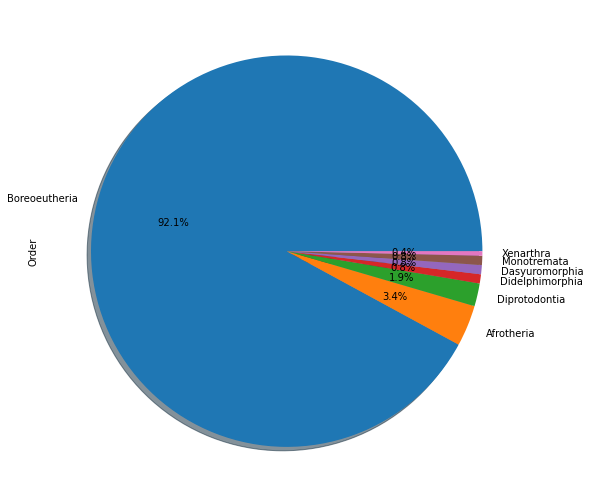

In [15]:
df.Order.value_counts().plot.pie(startangle=0, legend=False, shadow=True, subplots=True, figsize=(9, 9), autopct='%1.1f%%')

## Closer Order

In [16]:
Mammalia_Orders_Closer = ["Dermoptera",
                  "Glires",
                  "Primates",
                  "Scandentia",
                  "Artiodactyla",
                  "Carnivora",
                  "Chiroptera",
                  "Eulipotyphla",
                  "Perissodactyla",
                  "Pholidota", #ends boroeutheria
                  "Ornithorhynchidae",
                  "Tachyglossidae", # ends Monotremata
                  "Chrysochloridae",
                  "Hyracoidea",
                  "Macroscelidea",
                  "Proboscidea",
                  "Sirenia",
                  "Tenrecidae",
                  "Tubulidentata", # ends Afrotheria
                  "Macraucheniidae", #ends Litopterna
                  "Toxodontidae", # ends Notoungulata
                  "Pilosa",
                  "Cingulata", # ends Xenarthra
                  "Dasyuridae",
                  "Myrmecobiidae",
                  "Thylacinidae", #ends Dasyuromorphia
                  "Didelphidae", # ends Didelphimorphia
                  "Acrobatidae",
                  "Burramyidae",
                  "Macropodidae",
                  "Petauridae",
                  "Phalangeridae",
                  "Phascolarctidae",
                  "Potoroidae",
                  "Pseudocheiridae",
                  "Tarsipedidae",
                  "Vombatidae", # ends Diprotodontia
                  "Microbiotheriidae", #ends  Microbiotheria
                  "Notoryctidae", #ends  Notoryctemorphia
                  "Caenolestidae",# ends Paucituberculata
                  "Peramelidae",
                  "Peroryctidae" #ends Peramelemorphia
                  ]

array([<AxesSubplot:ylabel='Order'>], dtype=object)

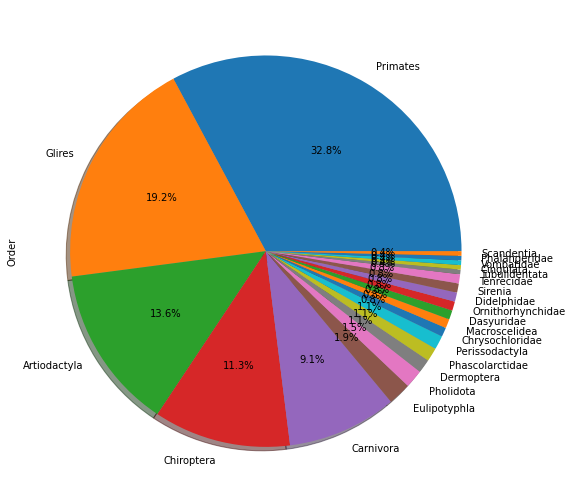

In [17]:
order_list = []
for n, item in enumerate(df["LINEAGE"]):
    #print(n,type(item))
    count = 0
    for classification in item:
        #print("## TRYING:", n+1, classification)
        #print(classification)
        if classification in Mammalia_Orders_Closer:
            count += 1
            order_list.append(classification)
            #print("## MATCH:", n+1, item, classification)
            if count > 1:
                print("## DOUBLE:", n+1, item, classification)
        #end if
    #end for
    
    if count == 0:
        #print("## NO MATCH:", n+1, item, classification)
        order_list.append("NaN")
        print()
#end for

df["Order"] = order_list
df.Order.value_counts().plot.pie(startangle=0, legend=False, shadow=True, subplots=True, figsize=(9, 9), autopct='%1.1f%%')

In [19]:
df.Order.value_counts()

Primates             87
Glires               51
Artiodactyla         36
Chiroptera           30
Carnivora            24
Eulipotyphla          5
Pholidota             4
Dermoptera            3
Phascolarctidae       3
Perissodactyla        3
Chrysochloridae       2
Macroscelidea         2
Dasyuridae            2
Ornithorhynchidae     2
Didelphidae           2
Sirenia               2
Tenrecidae            2
Tubulidentata         1
Cingulata             1
Vombatidae            1
Phalangeridae         1
Scandentia            1
Name: Order, dtype: int64

In [21]:
import numpy as np
for item in df.Order.unique():
    print(item)
    df3 = df[df["Order"] == item]
    #print(df3.shape)
    output = "" + item + ".txt"
    # get the taxa names
    np.savetxt(output, df3.BRANCH_NAME.values, fmt='%s')

Glires
Carnivora
Artiodactyla
Eulipotyphla
Pholidota
Phalangeridae
Vombatidae
Phascolarctidae
Dasyuridae
Didelphidae
Ornithorhynchidae
Cingulata
Tubulidentata
Sirenia
Dermoptera
Chrysochloridae
Tenrecidae
Macroscelidea
Primates
Chiroptera
Perissodactyla
Scandentia


In [ ]:
# save it
#import numpy as np
#df3 = df[df[]]

#np.savetxt("../results/suborder.txt", df.Order.values, fmt='%s')

## Break down Primates

In [ ]:
def classify(data, GROUPS):
    order_list = []
    for n, item in enumerate(data):
        count = 0
        for classification in item:
            if classification in GROUPS:
                count += 1
                order_list.append(classification)
                #print("## MATCH:", n+1, item, classification)
                if count > 1:
                    print("## DOUBLE:", n+1, item, classification)
            #end if
        #end for
    
        if count == 0:
            #print("## NO MATCH:", n+1, item, classification)
            order_list.append("NaN")
            print()
        #end if
    #end for
    return order_list
#end method

In [ ]:
df2 = df[df["Order"] == "Primates"]
Primates_SubOrder = ["Haplorrhini", "Strepsirrhini"]

df2["SubOrder"] = classify(df2["LINEAGE"], Primates_SubOrder)
#df2["SubOrder"].value_counts().plot()
df2["SubOrder"].value_counts().plot.pie()

In [ ]:
df2 = df[df["Order"] == "Primates"]
Primates_SubOrder = ["Simiiformes", "Tarsiiformes", "Chiromyiformes", "Lemuriformes", "Lorisiformes"]

df2["SubOrder"] = classify(df2["LINEAGE"], Primates_SubOrder)
#df2["SubOrder"].value_counts().plot()
df2["SubOrder"].value_counts().plot.pie()

In [ ]:
df2 = df[df["Order"] == "Primates"]
Primates_SubOrder = ["Catarrhini", "Platyrrhini", "Tarsiidae", 
                     "Daubentoniidae", "Cheirogaleidae", "Indriidae",
                    "Lemuridae", "Lepilemuridae", "Paleopropithecidae",
                    "Galagidae", "Lorisidae"]

df2["SubOrder"] = classify(df2["LINEAGE"], Primates_SubOrder)
#df2["SubOrder"].value_counts().plot()
df2["SubOrder"].value_counts().plot.pie()

## Tree manipulation, changing the leaf filenames
#### Mostly, change accession to Taxon ID. Useful for iTOL.

In [ ]:
TREE_NEWICK_TAXONIDs = TREE_NEWICK
TREE_NEWICK_TAXONIDs

In [ ]:

t = Tree(TREE_NEWICK_TAXONIDs);
count = 1
    
for ACCESSION in t.get_leaf_names():
    #print("# Checking", ACCESSION)


    for i in DATA_DICT.keys():
        #print(i, DATA_DICT[i]["ACCESSION"])
        if ACCESSION == DATA_DICT[i]["ACCESSION"]:
            #print("\t", DATA_DICT[i]["TAXON_ID"])
            
            
            TREE_NEWICK_TAXONIDs = TREE_NEWICK_TAXONIDs.replace(str(ACCESSION), str(DATA_DICT[i]["TAXON_ID"]))
            if ACCESSION in TREE_NEWICK_TAXONIDs: print("\t", "match found")
        #end if
    #end for
#end outer for

print("# Done")

In [ ]:
type(TREE_NEWICK_TAXONIDs)

In [ ]:
TREE_NEWICK_TAXONIDs

In [ ]:
TREE_NEWICK_SpeciesNames = TREE_NEWICK

t = Tree(TREE_NEWICK_SpeciesNames);
count = 1
    
for ACCESSION in t.get_leaf_names():
    #print("# Checking", ACCESSION)


    for i in DATA_DICT.keys():
        #print(i, DATA_DICT[i]["ACCESSION"])
        if ACCESSION == DATA_DICT[i]["ACCESSION"]:
            #print("\t", DATA_DICT[i]["LINEAGE"][-1])
            
            
            TREE_NEWICK_SpeciesNames = TREE_NEWICK_SpeciesNames.replace(str(ACCESSION), str(DATA_DICT[i]["LINEAGE"][-1]))
            #if ACCESSION in TREE_NEWICK_TAXONIDs: print("\t", "match found")
        #end if
    #end for
#end outer for


print(TREE_NEWICK_SpeciesNames)

In [ ]:
TREE_NEWICK_SpeciesNames_withAnnotation = TREE_NEWICK

t = Tree(TREE_NEWICK_SpeciesNames_withAnnotation);
count = 1
    
for ACCESSION in t.get_leaf_names():
    for i in DATA_DICT.keys():
        if ACCESSION == DATA_DICT[i]["ACCESSION"]:
            LINEAGE = DATA_DICT[i]["LINEAGE"][-6]
            #TREE_NEWICK_SpeciesNames_withAnnotation = TREE_NEWICK_SpeciesNames.replace(str(ACCESSION), str(DATA_DICT[i]["LINEAGE"][-1]))
            TREE_NEWICK_SpeciesNames_withAnnotation = TREE_NEWICK_SpeciesNames_withAnnotation.replace(str(ACCESSION), str(DATA_DICT[i]["LINEAGE"][-1]) + "{" + LINEAGE +"}")
        #end if
    #end for
#end outer for

TREE_NEWICK_SpeciesNames_withAnnotation = TREE_NEWICK_SpeciesNames_withAnnotation.replace(" ", "")
print(TREE_NEWICK_SpeciesNames_withAnnotation)